In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from Python.tigre.algorithms.single_pass_algorithms import FDK
from Python.tigre.utilities.io.varian.varian_io import ScanParams,ReconParams,read_varian_geometry, load_projections
from Python.tigre.utilities.mask_CBCT import maskCBCT

In [ ]:
mydir = "C:/CBCT_Scatter_Removal_Project/data/clinical/4100758/2021-07-06_101037/11528a87-b894-4239-846d-45d8fd1efeda"

In [ ]:
scan_params = ScanParams(mydir)
recon_params = ReconParams(mydir)
geometry = read_varian_geometry(scan_params,recon_params)

In [ ]:
angular_threshold = scan_params.calculate_angular_threshold()
proj_data = load_projections(mydir, angular_threshold)

In [ ]:
def abs_diff(a,b):
    return np.abs(a-b)

def prct_diff(a,b):
    abs = abs_diff(a,b)
    return 100*abs/(np.abs(a)+1e-6)

In [97]:
recon = np.load('./data/recon_sks2.npy',allow_pickle=True)

In [138]:
matfile=h5py.File('C:/CBCT_Scatter_Removal_Project/4100758_proj_recon.mat','r')
print(list(matfile.keys()))
matrec = np.array(matfile.get('recon_sks'))
matfile.close()

matrec= np.squeeze(matrec)
# matrec = np.transpose(matrec,axes=(0,2,1))
matrec[matrec<0]=0

['proj', 'proj_dps', 'proj_lg', 'recon', 'recon_sks']


In [139]:

recon[recon<0]=0

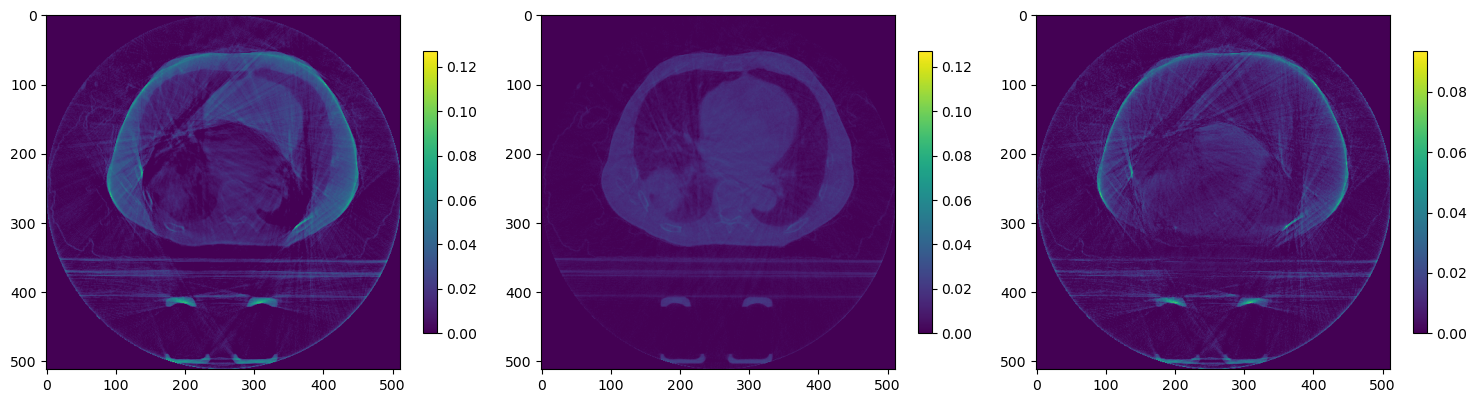

In [140]:
n = 44
r1 = maskCBCT(matrec)[n]
r2 = maskCBCT(recon)[n]
abs = abs_diff(r1,r2)
rmax = np.max([r1,r2])

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(r1.T,vmax=rmax)
plt.colorbar(shrink=0.6)
plt.subplot(132)
plt.imshow(r2.T,vmax=rmax)
plt.colorbar(shrink=0.6)
plt.subplot(133)
plt.imshow(abs.T)
plt.colorbar(shrink=0.6)
plt.tight_layout()
plt.show()

In [ ]:
plt.hist(r1.ravel(),bins=100,alpha=0.4)
plt.hist(r2.ravel(),bins=100,alpha=0.4)
plt.show()